# Heart Disease prediction 

### Heart disease is one of the biggest causes of morbidity and mortality among the population of the world. Prediction of cardiovascular disease is regarded as one of the most important subjects in the section of clinical data science. The amount of data in the healthcare industry is huge. In this particular project, we try to predict whether a person is suffering from heart disease or not.

#### Loading the libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
heart_data=pd.read_csv(r'C:/Users/RitwikBijalwan_25/project_work/projects_data_science/heart disease/heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# rows and columns
heart_data.shape

(303, 14)

#### There are 303 rows and 14 columns/features 

In [4]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Dataset Dictionary =>
    -age -> age in years
    
    -sex -> gender (male=1, female=0)
    
    -cp -> chest pain type
          0 => typical angina
          1 => atypical angina
          2 => non-anginal pain
          3 => asymptomatic
          
    -trestbps -> resting blood pressure (in mm Hg on admission to the hospital)
    
    -chol -> serum cholestoral in mg/dl
    
    -fbs -> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    
    -restecg -> resting electrocardiographic results
          0 => normal
          1 =>  having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
          2 =>  showing probable or definite left ventricular hypertrophy by Estes' criteria
          
     -thalach =>  maximum heart rate achieved
     
     -exang => exercise induced angina (1 = yes; 0 = no)
     
     -oldpeak => ST depression induced by exercise relative to rest
     
     -slope => the slope of the peak exercise ST segment
        1 => upsloping
        2 => flat
        3 => downsloping
        
     -ca ->  number of major vessels (0-3) colored by flourosopy
     
     -thal -> 3 = normal; 6 = fixed defect; 7 = reversable defect
     
     -target -> binary outcome depicting whether heart disease or not

In [5]:
# datatype for each column
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### All the columns have their data types as either int type or float type. Some of them represents categories but are having numerical type.

In [6]:
heart_data.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

#### There is no missing value present in our data so no need to bother about it. 

In [7]:
# Summary for different features
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


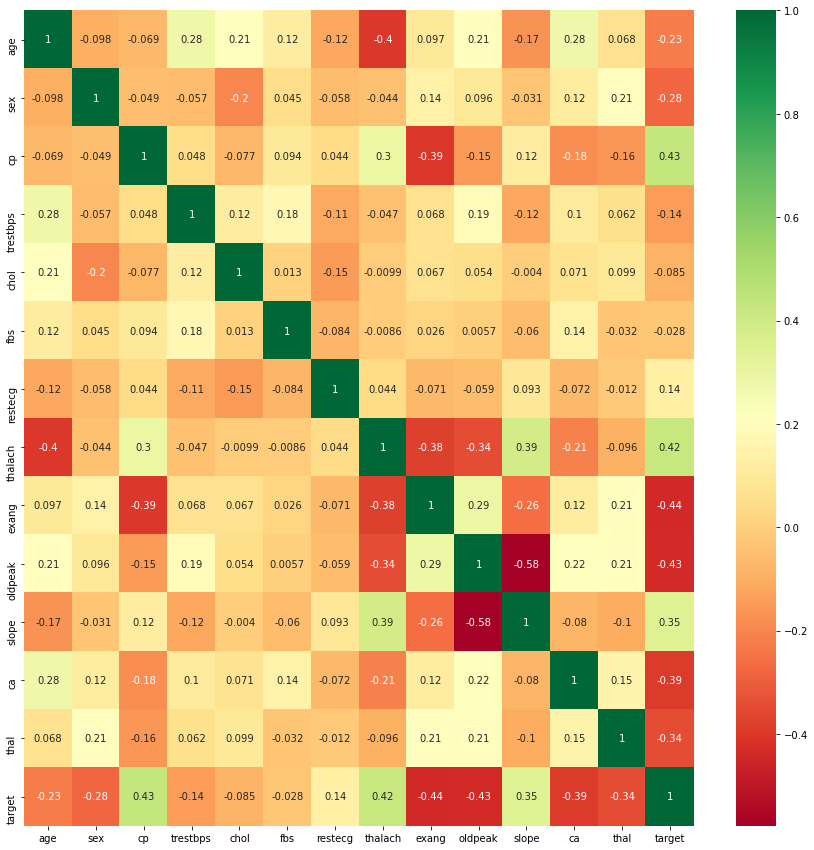

In [8]:
#pearson correlation(in case variables are having linear relationship)
plt.figure(figsize=(15,15))
sns.heatmap(heart_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

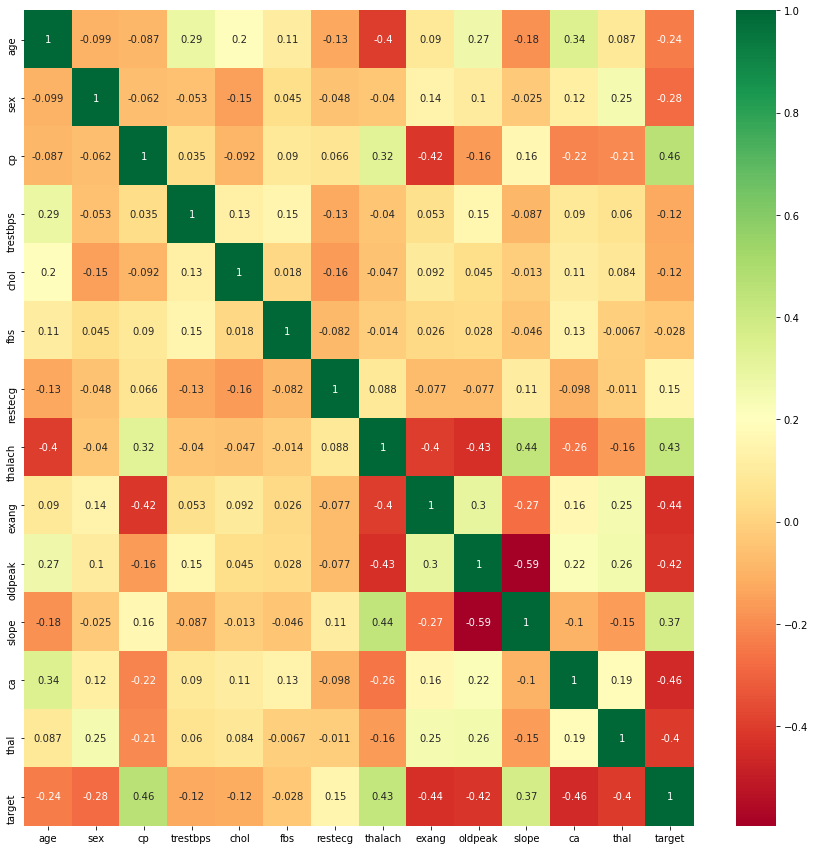

In [9]:
# spearman ranked correlation (in case if the relation is linear or non-linear)
plt.figure(figsize=(15,15))
sns.heatmap(heart_data.corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

<AxesSubplot:title={'center':'Correlation with target'}>

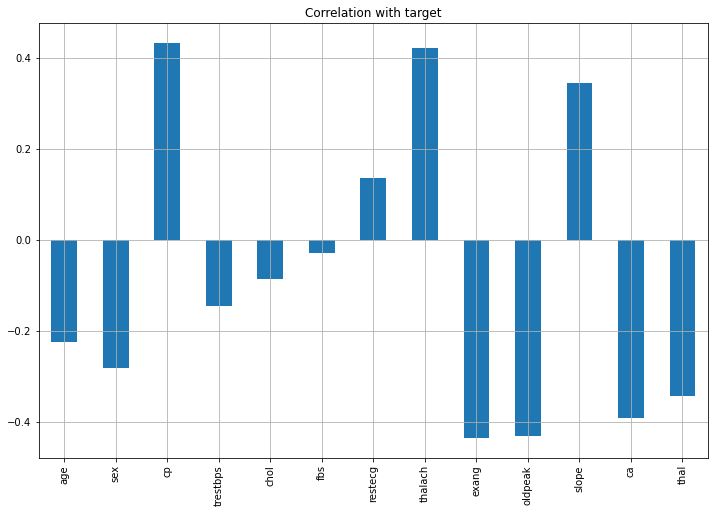

In [10]:
heart_data.drop('target', axis=1).corrwith(heart_data.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

#### With dependent variable, independent variables like exang, oldpeak, ca, thal shows somewhat strong negative correlation whereas variables like cp, thalach, slope shows comparatively strong positive correlation with dependent variable.

#### Very weak correlation with target is shown by chol and fbs.

#### In terms of relationship between independent variables only, strongest relationship, whether positive or negative, is shown by oldpeak and slope followed by correlation between thalach and slope.
 

<AxesSubplot:ylabel='target'>

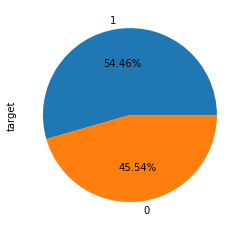

In [11]:
heart_data['target'].value_counts().plot(kind='pie',autopct='%1.2f%%')

#### There is not much imbalance in the dataset and also there is not much difference in counts for two different values of target. 

In [12]:
# Some of the variables are representing categories even they are having int or float data type, we need to take care of it
categorical_val = []
continous_val = []
for column in heart_data.columns:
    if len(heart_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [13]:
np.unique(categorical_val)

array(['ca', 'cp', 'exang', 'fbs', 'restecg', 'sex', 'slope', 'target',
       'thal'], dtype='<U7')

In [14]:
np.unique(continous_val)

array(['age', 'chol', 'oldpeak', 'thalach', 'trestbps'], dtype='<U8')

<AxesSubplot:>

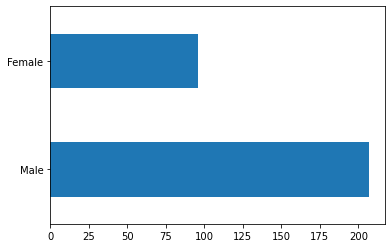

In [15]:
heart_data['sex'].replace({0:"Female",1:"Male"}).value_counts().plot(kind="barh")


<AxesSubplot:ylabel='sex'>

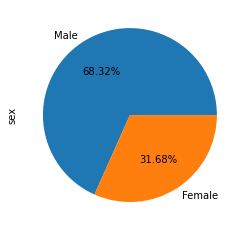

In [16]:
heart_data['sex'].replace({0:"Female",1:"Male"}).value_counts().plot(kind="pie",autopct='%1.2f%%')


Number of patients being male are more than double the number of patients being female which denotes that majority of patients,  whether having heart disease or not, are represented by males, even though there is no such kind of imbalance due to genders as minority class here is approximately 32% of total population.  

<AxesSubplot:xlabel='target', ylabel='count'>

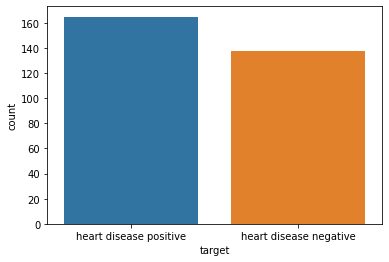

In [17]:
sns.countplot(heart_data['target'].replace({0:"heart disease negative",1:"heart disease positive"}))

There is slight difference in counts of those who are having heart disease in comparison to their counterparts with heart disease positive case slightly above the negative cases. 

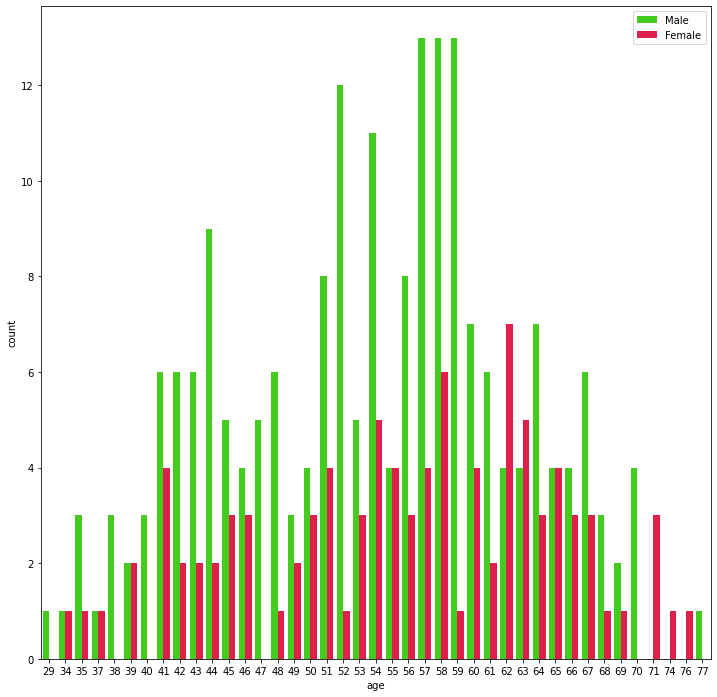

In [18]:
plt.figure(figsize=(12,12))
sns.countplot(heart_data['age'],hue=heart_data['sex'].replace({0:"Female",1:"Male"}),palette='prism')
plt.legend(loc=1)
plt.show()

Even though males are quite high in count in comparison to females, it is observable that in case of both males and females, counts of patients is more above 45-50 years group rather than those below 45-50 age groups.

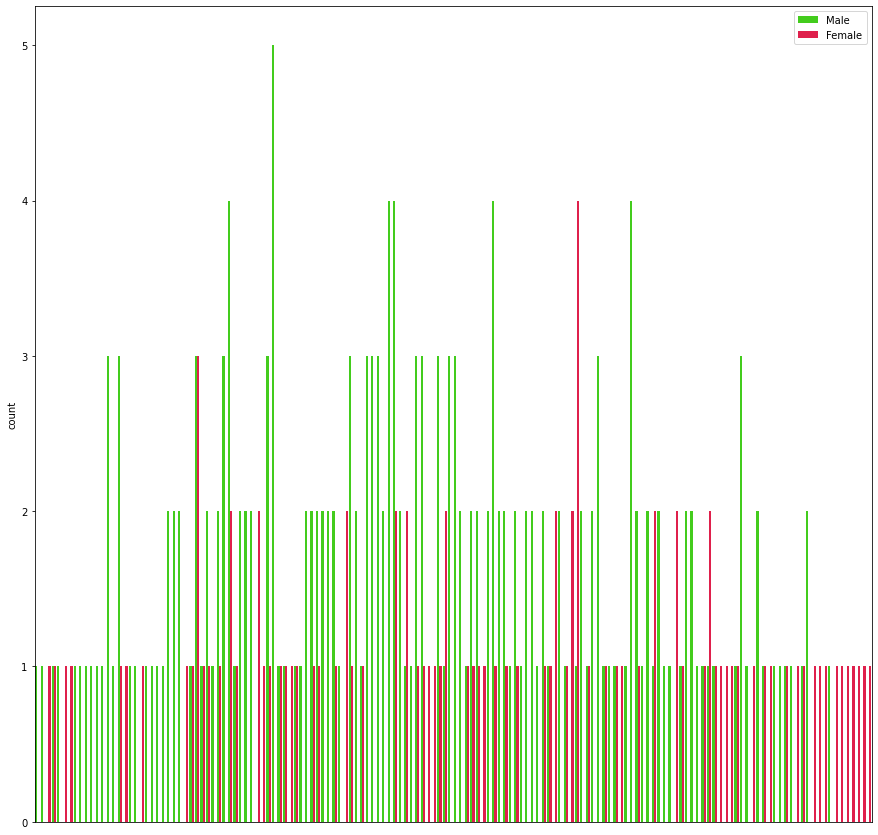

In [19]:
plt.figure(figsize=(15,15))
fig1=sns.countplot(heart_data['chol'],hue=heart_data['sex'].replace({0:"Female",1:"Male"}),palette='prism')
fig1.set(xticklabels=[])
fig1.set(xlabel=None)
fig1.tick_params(bottom=False)
plt.legend(loc=1)
plt.show()

In [20]:
heart_data[['chol','sex']].value_counts().head(15)

chol  sex
212   1      5
282   1      4
233   1      4
234   1      4
204   1      4
269   0      4
254   1      4
245   1      3
197   1      3
203   1      3
274   1      3
211   1      3
246   1      3
309   1      3
243   1      3
dtype: int64

In terms of cholesterol level, majority of times either both genders share equal proportion for a particular cholesterol value or number of males are quite higher than number of females for a particular cholesterol value, there is only one case when females are above males in terms of cholesterol value and that is at 269 cholesterol level only.

In [21]:
heart_data.thalach.unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

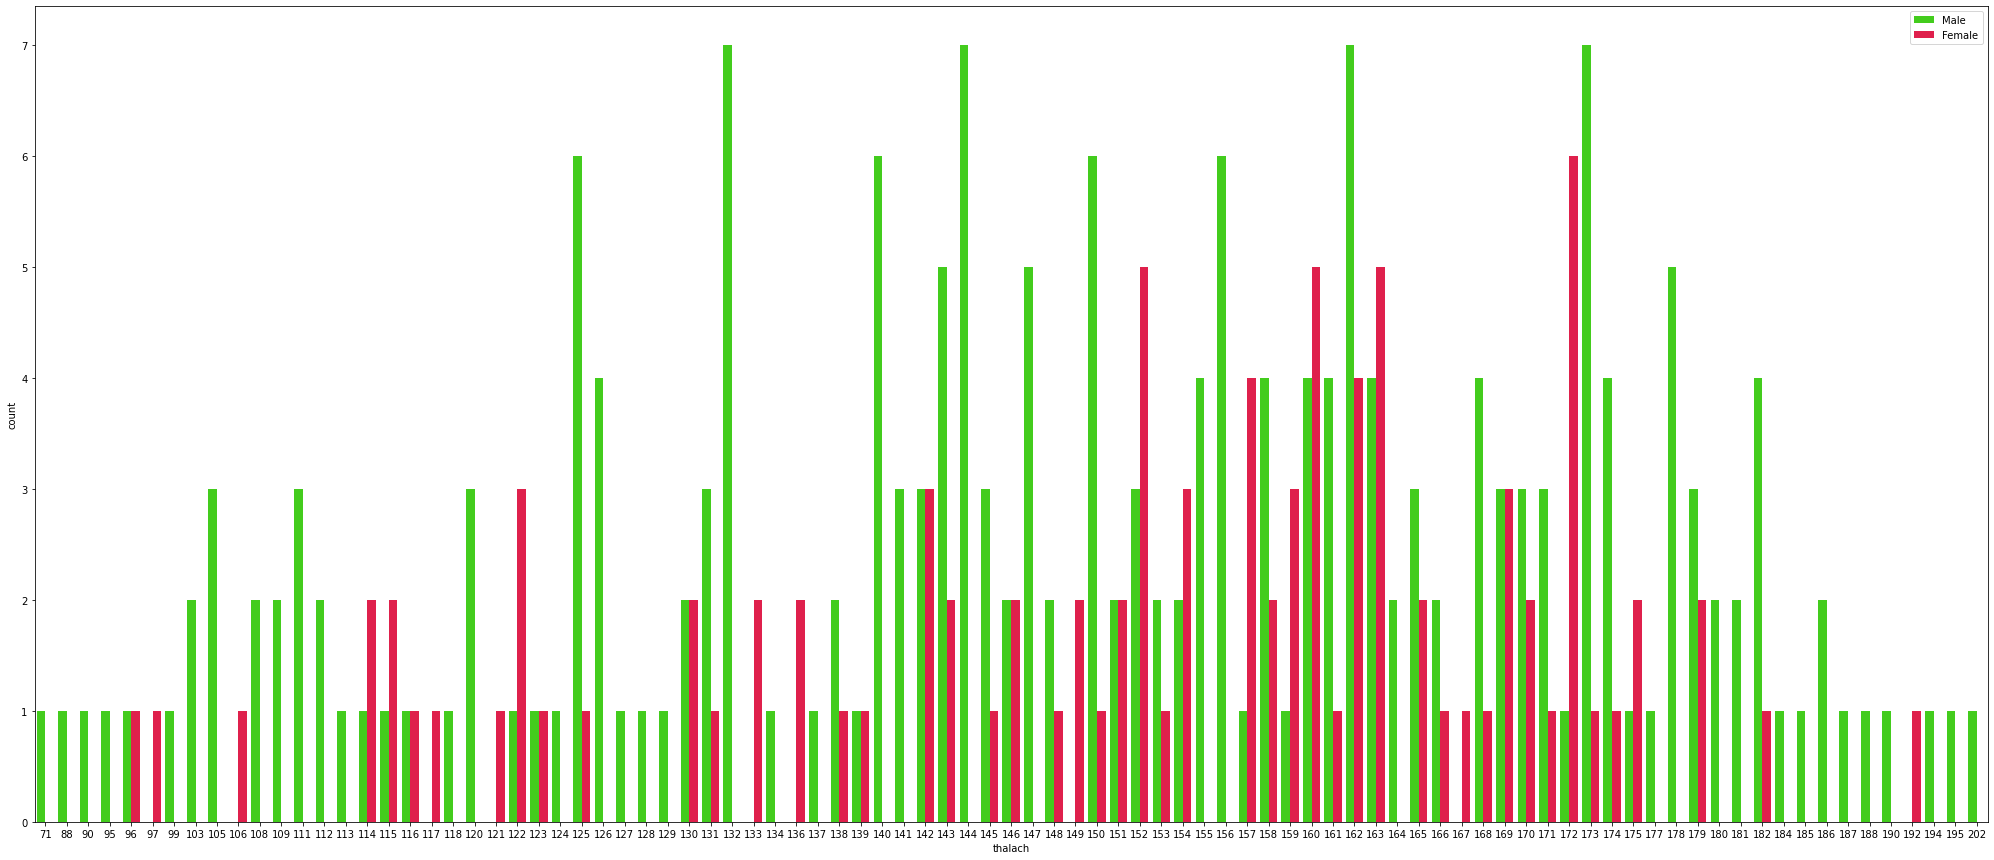

In [22]:
plt.figure(figsize=(35,15))
sns.countplot(heart_data['thalach'],hue=heart_data['sex'].replace({0:"Female",1:"Male"}),palette='prism')
plt.legend(loc=1)
plt.show()

In terms of maximum heart rate observed, most of the population for females occur within 130-175 range with very few females having max heart rate above 175 or below 120.

<AxesSubplot:xlabel='cp', ylabel='count'>

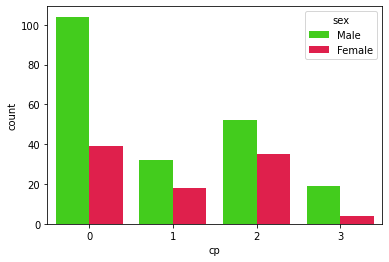

In [23]:
sns.countplot(heart_data['cp'],hue=heart_data['sex'].replace({0:"Female",1:"Male"}),palette='prism')

<AxesSubplot:xlabel='restecg', ylabel='count'>

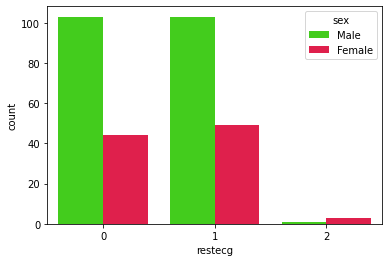

In [24]:
sns.countplot(heart_data['restecg'],hue=heart_data['sex'].replace({0:"Female",1:"Male"}),palette='prism')

In terms of ecg results, both the gender shows almost equal results for being normal or having ST-T wave abnormality with almost negligible result for third category for ecg results.

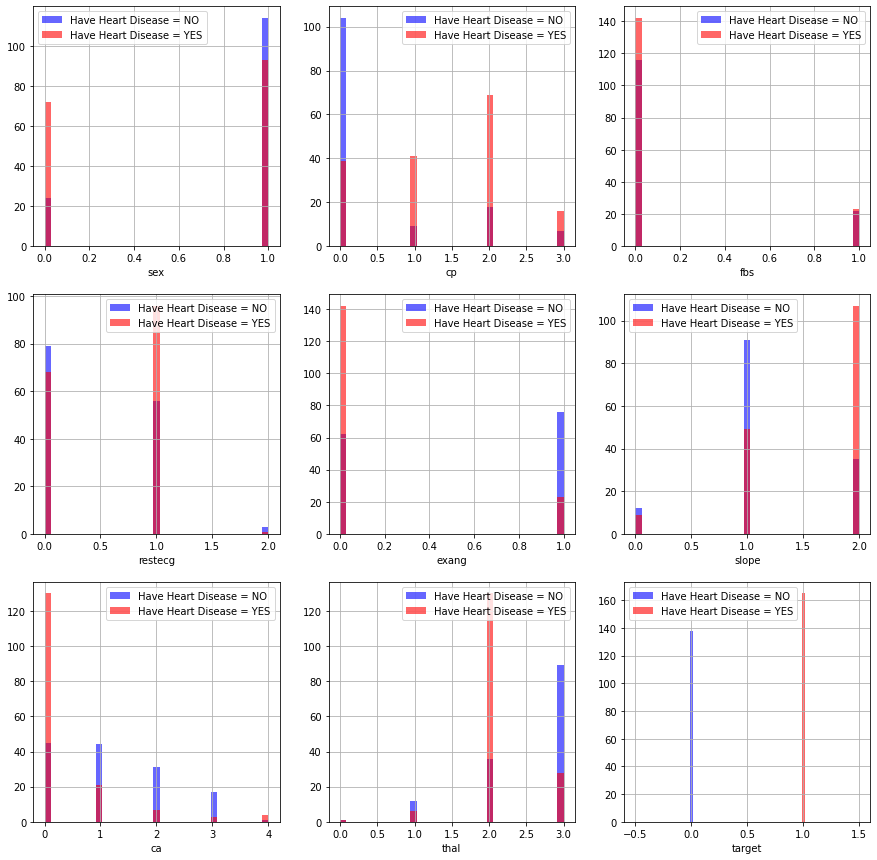

In [25]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    heart_data[heart_data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    heart_data[heart_data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

cp {Chest pain}: People with cp category 1, 2, 3 are more likely to have heart disease than people with cp 0.

restecg {resting EKG results}: People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems) are more likely to have heart disease.

exang {exercise-induced angina}: people with a value of 0 (No ==> angina induced by exercise) have more heart disease than people with a value of 1 (Yes ==> angina induced by exercise)

slope {the slope of the ST segment of peak exercise}: People with a slope value of 2 (Downslopins: signs of an unhealthy heart) are more likely to have heart disease than people with a slope value of 2 slope is 0 (Upsloping: best heart rate with exercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

ca {number of major vessels (0-3) stained by fluoroscopy}: the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.

thal {thalium stress result}: People with a thal value of 2 (defect corrected: once was a defect but ok now) are more likely to have heart disease.

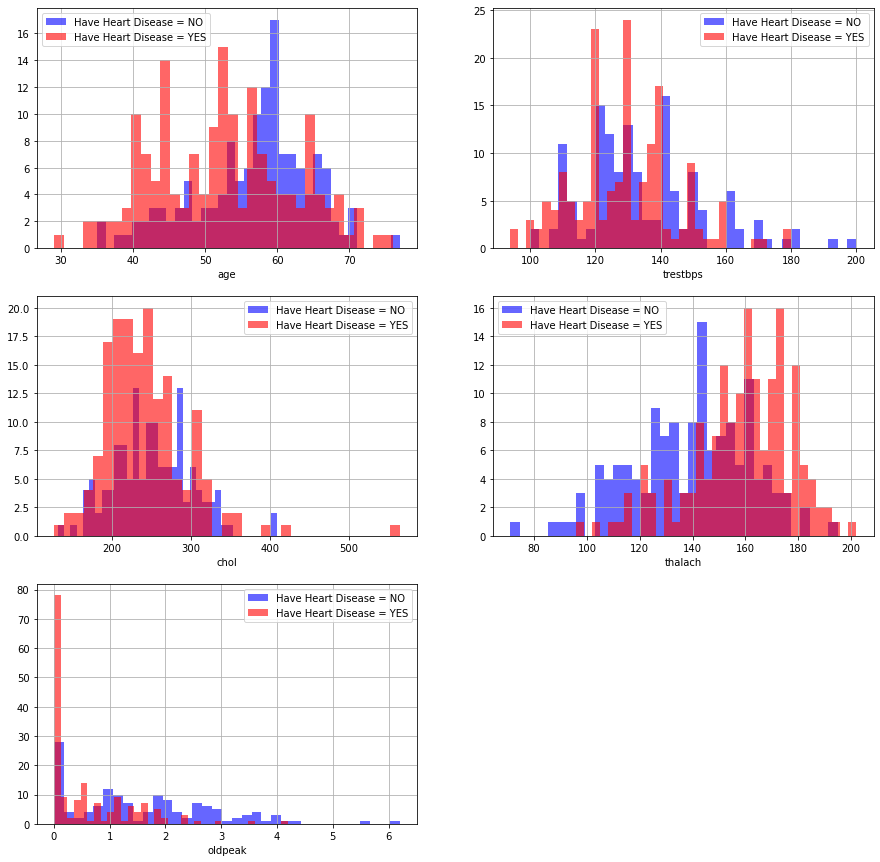

In [26]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    heart_data[heart_data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    heart_data[heart_data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

trestbps: resting blood pressure anything above 130-140 is generally of concern

chol: greater than 200 is of concern.

thalach: People with a maximum of over 140 are more likely to have heart disease.

the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more.

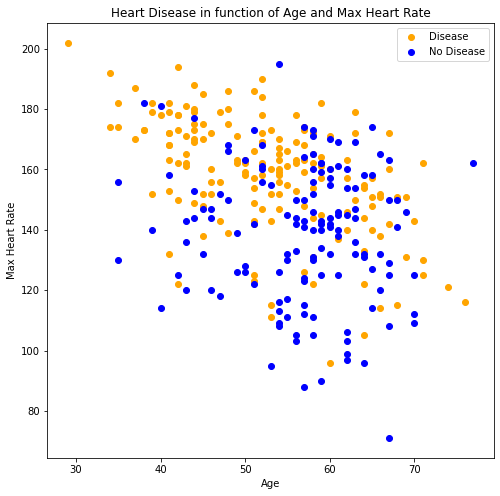

In [27]:
plt.figure(figsize=(8, 8))

# Scatter with postivie examples ( having heart disease)
plt.scatter(heart_data.age[heart_data.target==1],
            heart_data.thalach[heart_data.target==1],
            c="orange")

# Scatter with negative examples (not having heart disease)
plt.scatter(heart_data.age[heart_data.target==0],
            heart_data.thalach[heart_data.target==0],
            c="blue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show()

There seems to be negative correlation between age and max heart rate, evident from above scatter plot. There are very few values that act as an outlier both for the case when someone is having heart disease or not. However, people with age less than 50 appears to have heart disease with comparatively high max heart rate. With increasing age, concentration of people with heart disease is less and usually they have lower heart rate in comparison to young age groups. Extremely high or extremely low heart rate is rarely observable for any age group.

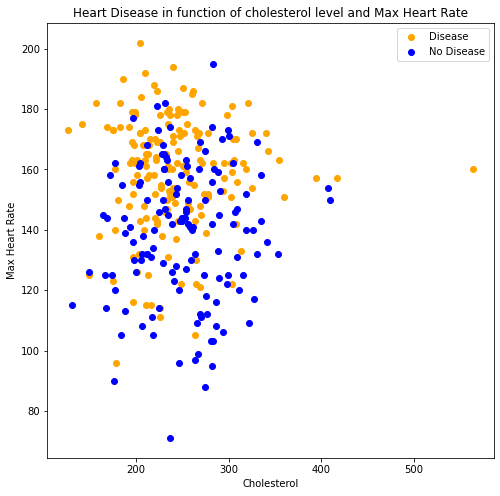

In [28]:
plt.figure(figsize=(8, 8))

# Scatter with postivie examples ( having heart disease)
plt.scatter(heart_data.chol[heart_data.target==1],
            heart_data.thalach[heart_data.target==1],
            c="orange")

# Scatter with negative examples (not having heart disease)
plt.scatter(heart_data.chol[heart_data.target==0],
            heart_data.thalach[heart_data.target==0],
            c="blue")

plt.title("Heart Disease in function of cholesterol level and Max Heart Rate")
plt.xlabel("Cholesterol")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.show()

There are very few people that shows extreme cholesterol levels and for those who have extremely high cholesterol levels show heart rate value somewhere near 150-170. Also, those most of the people have cholesterol level in between 200-300 with most of them having heart disease and for those who are having heart disease usually have comparatively high heart rate value. people with max heart rate of 140 or lower seems to have most of the times cholesterol level below 300 or 350 and most of them are those who are not having heart disease.

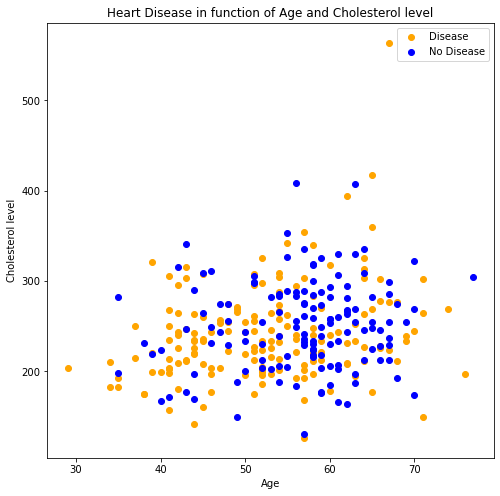

In [29]:
plt.figure(figsize=(8, 8))

# Scatter with postivie examples ( having heart disease)
plt.scatter(heart_data.age[heart_data.target==1],
            heart_data.chol[heart_data.target==1],
            c="orange")

# Scatter with negative examples (not having heart disease)
plt.scatter(heart_data.age[heart_data.target==0],
            heart_data.chol[heart_data.target==0],
            c="blue")

plt.title("Heart Disease in function of Age and Cholesterol level")
plt.xlabel("Age")
plt.ylabel("Cholesterol level")
plt.legend(["Disease", "No Disease"])
plt.show()

In terms of age and cholesterol level, people with age less than 60 are having heart disease with cholesterol level more concentrated between 200-300, however with increasing age, concentration of people without heart disease is more in comparison to those with heart disease with some outliers for both the cases. Cholesterol level above 350 is rarely observed.

### Preprocessing the data 

<AxesSubplot:>

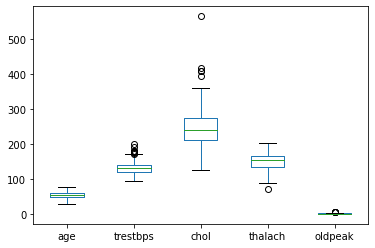

In [30]:
# Checking for outliers
heart_data[['age','trestbps','chol','thalach','oldpeak']].plot(kind='box')

Except for age, all other continous variables have outliers. We need to handle them as it can affect performance of our model to be built.

#### trestbps 

In [31]:
heart_data['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<AxesSubplot:>

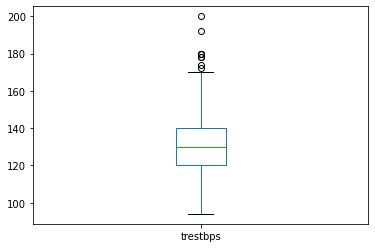

In [32]:
heart_data['trestbps'].plot(kind='box')

In [33]:
140+(140-120)*1.5,140+(140-120)*3

(170.0, 200)

In [34]:
heart_data[heart_data['trestbps']>170]['trestbps'].count()

9

<AxesSubplot:>

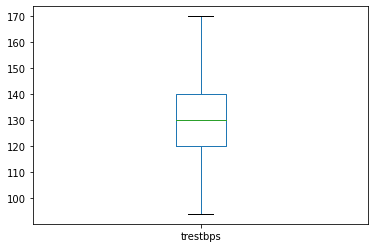

In [35]:
heart_data[heart_data['trestbps']<=170]['trestbps'].plot(kind='box')

Instead of removing the outliers, we will replace them with median values in trestbps.

In [36]:
for i in heart_data.trestbps:
    if i> 170:
        heart_data['trestbps'].replace(i,heart_data['trestbps'].median(),inplace=True)
    else:
        pass
heart_data.trestbps.describe()

count    303.000000
mean     130.092409
std       15.130275
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      170.000000
Name: trestbps, dtype: float64

<AxesSubplot:>

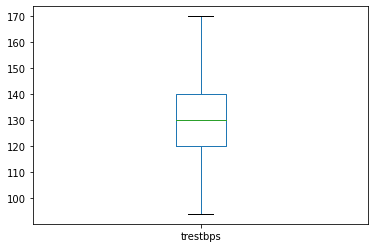

In [37]:
heart_data['trestbps'].plot(kind='box')

<AxesSubplot:>

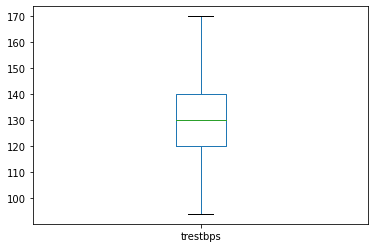

In [38]:
heart_data.trestbps.plot(kind='box')

#### chol

<AxesSubplot:>

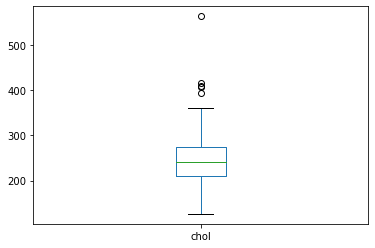

In [39]:
heart_data['chol'].plot(kind='box')

In [40]:
heart_data['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

In [41]:
274.5+(274.5-211)*1.5,274.5+(274.5-211)*3

(369.75, 465.0)

In [42]:
heart_data[heart_data['chol']>369.75]['chol'].count()

5

<AxesSubplot:>

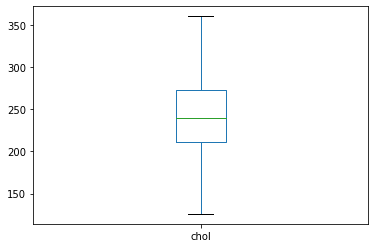

In [43]:
heart_data[heart_data['chol']<=369.75]['chol'].plot(kind='box')

Similarly for chol variable, we can replace outliers with median because if we try to replace them with mean or upper capped value, there will be higher skew in comparison to median value imputation.

In [44]:
for i in heart_data.chol:
    if i> 369.75:
        heart_data['chol'].replace(i,heart_data['chol'].median(),inplace=True)
    else:
        pass
heart_data.chol.describe()

count    303.000000
mean     242.993399
std       44.721507
min      126.000000
25%      211.000000
50%      240.000000
75%      272.000000
max      360.000000
Name: chol, dtype: float64

<AxesSubplot:>

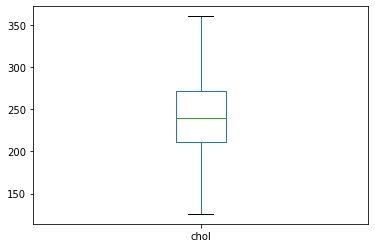

In [45]:
heart_data.chol.plot(kind='box')

#### thalach 

<AxesSubplot:>

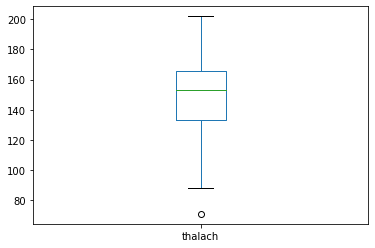

In [46]:
heart_data['thalach'].plot(kind='box')

In [47]:
heart_data['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In [48]:
133.5-(166-133.5)*1.5,133.5-(166-133.5)*3

(84.75, 36.0)

In [49]:
heart_data[heart_data['thalach']<84.25]['thalach'].count()

1

<AxesSubplot:>

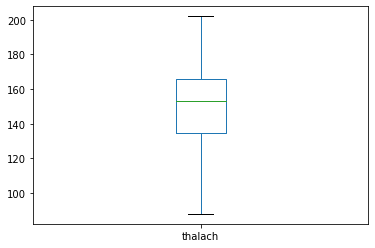

In [50]:
heart_data[heart_data['thalach']>=84.25]['thalach'].plot(kind='box')

As there is only one value that is outlier, we can make mean, median or bottom capped replacement for outlier value. Here, we will make use of bottom capped value to treat the only outlier in thalach.

In [51]:
for i in heart_data.thalach:
    if i< 84.75:
        heart_data['thalach'].replace(i,88,inplace=True)
    else:
        pass
heart_data.thalach.describe()

count    303.000000
mean     149.702970
std       22.732046
min       88.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

<AxesSubplot:>

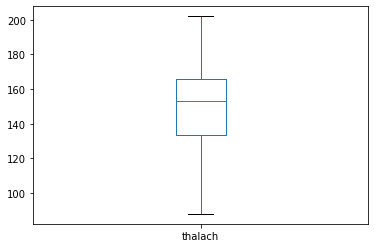

In [52]:
heart_data.thalach.plot(kind='box')

#### oldpeak 

<AxesSubplot:>

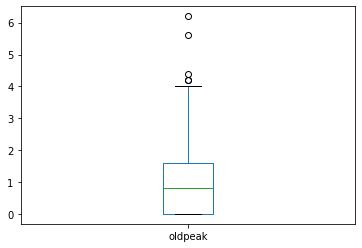

In [53]:
heart_data['oldpeak'].plot(kind='box')

In [54]:
heart_data.oldpeak.describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [55]:
1.6+(1.6-0)*1.5,1.6+(1.6-0)*3

(4.0, 6.4)

In [56]:
heart_data[heart_data['oldpeak']>4]['oldpeak'].count()

5

<AxesSubplot:>

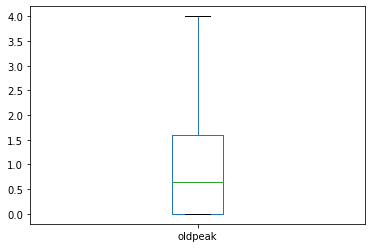

In [57]:
heart_data[heart_data['oldpeak']<=4]['oldpeak'].plot(kind='box')

In [58]:
for i in heart_data.oldpeak:
    if i>4:
        heart_data['oldpeak'].replace(i,heart_data['oldpeak'].median(),inplace=True)
    else:
        pass
heart_data.oldpeak.describe()

count    303.000000
mean       0.971617
std        1.041070
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        4.000000
Name: oldpeak, dtype: float64

<AxesSubplot:>

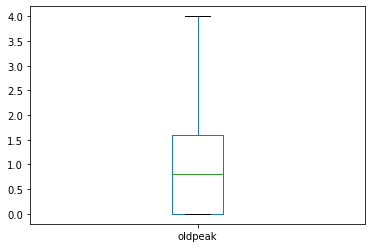

In [59]:
heart_data.oldpeak.plot(kind='box')

Data is free from any outliers now. Also, we had given more importance to imputation than deletion due to lesser data available.

In [60]:
heart_data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


Here we do not have values on same scale for every feature. Unequal scalings may result in importance to be give more to such variables which have values in tens, hundreds, thousands etc. over other variables with lower fractions. Hence, it is required to bring down all the variables to same scale to avoid any kind of bias towards high valued variable. Since we have dealt with outliers in data, we can use standard scaling which scales the data based on mean and standard deviations. If there were heavy skew in the data present, we could have the option to use robust scaling which makes use of median and inter quartile range to scale the variables

In [61]:
categorical_val.remove('target')
heart_data = pd.get_dummies(heart_data, columns = categorical_val,drop_first=True)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_data[col_to_scale] = s_sc.fit_transform(heart_data[col_to_scale])
heart_data.head(2)

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.952197,0.986912,-0.223828,0.013088,1.278089,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.006118,0.156931,1.643439,2.432655,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## ML Models 

In [62]:
train_data=heart_data.drop('target',axis=1)
test_data=heart_data[['target']]

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,test_data,test_size=.3,stratify=test_data['target'],random_state=12)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(212, 22) (91, 22)
(212, 1) (91, 1)


Here we used stratified train test split which depicts that whatever proportion of data we used for training, same proportion of data is used in test also. For example, if we have binary classes and if in training set our class proportion is 49:2, then if we use stratified approach, then for test set, our class proportion is also 49:2. If we do not use stratified approach, then there is not always guarantee that proportion of classes for training set and test set always be same.  

### Logistic Regression 

In [64]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=1234).fit(x_train,y_train)
pred_log_train=log_reg.predict(x_train)
pred_log_test=log_reg.predict(x_test)
print("Training Accuracy:",log_reg.score(x_train,y_train))
print("Test Accuracy:",log_reg.score(x_test,y_test))

Training Accuracy: 0.910377358490566
Test Accuracy: 0.8021978021978022


In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
print("For Training set:\n",confusion_matrix(y_train,pred_log_train))

For Training set:
 [[ 85  12]
 [  7 108]]


In [67]:
print("For Test set:\n",confusion_matrix(y_test,pred_log_test))

For Test set:
 [[26 15]
 [ 3 47]]


In [68]:
print("Classification Report for training set:")
pd.DataFrame(classification_report(y_train, pred_log_train, output_dict=True)).T

Classification Report for training set:


,precision,recall,f1-score,support
0,0.923913,0.876289,0.899471,97.000000
1,0.900000,0.939130,0.919149,115.000000
accuracy,0.910377,0.910377,0.910377,0.910377
macro avg,0.911957,0.907710,0.909310,212.000000
weighted avg,0.910941,0.910377,0.910145,212.000000


In [69]:
print("Classification Report for test set:")
pd.DataFrame(classification_report(y_test, pred_log_test, output_dict=True)).T

Classification Report for test set:


,precision,recall,f1-score,support
0,0.896552,0.634146,0.742857,41.000000
1,0.758065,0.940000,0.839286,50.000000
accuracy,0.802198,0.802198,0.802198,0.802198
macro avg,0.827308,0.787073,0.791071,91.000000
weighted avg,0.820460,0.802198,0.795840,91.000000


In [70]:
from sklearn.metrics import roc_curve

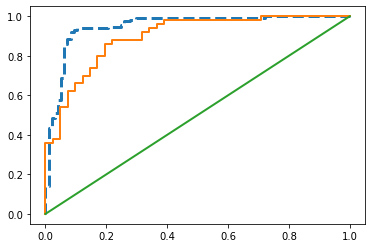

In [71]:
log_prob_train=log_reg.predict_proba(x_train)[:,1]
log_prob_test=log_reg.predict_proba(x_test)[:,1]


fpr_lrtr,tpr_lrtr,threshold_lrtr=roc_curve(y_train,log_prob_train)
fpr_lrts,tpr_lrts,threshold_lrts=roc_curve(y_test,log_prob_test)

plt.plot(fpr_lrtr,tpr_lrtr,linewidth=3,linestyle="--")
plt.plot(fpr_lrts,tpr_lrts,linewidth=2)
plt.plot(fpr_lrtr,fpr_lrtr,linewidth=2)

### Performing Hyperparameter Tuning-Logistic Regression

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
LogisticRegression()

LogisticRegression()

In [74]:
paramgrid={"penalty":['l1','l2'],"C":[0.00001,0.0001,0.001,0.01,0.1,1,5,10,20,50,100],"solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [75]:
grid_log=GridSearchCV(LogisticRegression(random_state=154),paramgrid,verbose=True,n_jobs=-1,refit=True,cv=10,return_train_score=True).fit(x_train,y_train)
print(grid_log.best_params_);print(grid_log.best_score_,'\n')

Fitting 10 folds for each of 110 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    4.1s


{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.8865800865800866 



[Parallel(n_jobs=-1)]: Done 1092 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:   11.2s finished


In [76]:
log_tuned=LogisticRegression(C=10,penalty='l1',solver='liblinear',random_state=27).fit(x_train,y_train)
pred_tuned_train=log_tuned.predict(x_train)
pred_tuned_test=log_tuned.predict(x_test)
print("Training Accuracy:",log_tuned.score(x_train,y_train))
print("Test Accuracy:",log_tuned.score(x_test,y_test))

Training Accuracy: 0.9198113207547169
Test Accuracy: 0.7912087912087912


In [77]:
print("For Training set:\n",confusion_matrix(y_train,pred_tuned_train))

For Training set:
 [[ 87  10]
 [  7 108]]


In [78]:
print("For Test set:\n",confusion_matrix(y_test,pred_tuned_test))

For Test set:
 [[26 15]
 [ 4 46]]


In [79]:
print("Classification Report for training set:")
pd.DataFrame(classification_report(y_train, pred_tuned_train, output_dict=True)).T

Classification Report for training set:


,precision,recall,f1-score,support
0,0.925532,0.896907,0.910995,97.000000
1,0.915254,0.939130,0.927039,115.000000
accuracy,0.919811,0.919811,0.919811,0.919811
macro avg,0.920393,0.918019,0.919017,212.000000
weighted avg,0.919957,0.919811,0.919698,212.000000


In [80]:
print("Classification Report for test set:")
pd.DataFrame(classification_report(y_test, pred_tuned_test, output_dict=True)).T

Classification Report for test set:


,precision,recall,f1-score,support
0,0.866667,0.634146,0.732394,41.000000
1,0.754098,0.920000,0.828829,50.000000
accuracy,0.791209,0.791209,0.791209,0.791209
macro avg,0.810383,0.777073,0.780612,91.000000
weighted avg,0.804816,0.791209,0.785380,91.000000


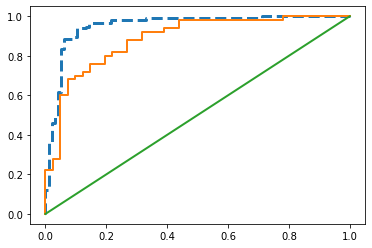

In [81]:
tuned_prob_train=log_tuned.predict_proba(x_train)[:,1]
tuned_prob_test=log_tuned.predict_proba(x_test)[:,1]


fpr_tutr,tpr_tutr,threshold_tutr=roc_curve(y_train,tuned_prob_train)
fpr_tuts,tpr_tuts,threshold_tuts=roc_curve(y_test,tuned_prob_test)

plt.plot(fpr_tutr,tpr_tutr,linewidth=3,linestyle="--")
plt.plot(fpr_tuts,tpr_tuts,linewidth=2)
plt.plot(fpr_tutr,fpr_tutr,linewidth=2)

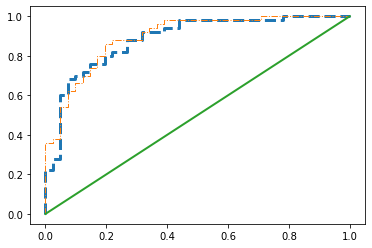

In [82]:
# Test accuracy -> baseline vs tuned model
plt.plot(fpr_tuts,tpr_tuts,linewidth=3,linestyle="--")
plt.plot(fpr_lrts,tpr_lrts,linewidth=1,linestyle='-.')
plt.plot(fpr_tuts,fpr_tuts,linewidth=2)

In above two models, it is observed that there is significant difference in training and test accuracy for both baseline as well as tuned models. In other words, test accuracy do not improve even when we make use of tuning the hyperparameters. This may be due to lesser data available to us. Also, based on roc curve, both the models have almost same area covered, there is not much difference in their area being covered.

### Decision Tree 

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1234).fit(x_train,y_train)
pred_dt_train=dt.predict(x_train)
pred_dt_test=dt.predict(x_test)
print("Training Accuracy:",dt.score(x_train,y_train))
print("Test Accuracy:",dt.score(x_test,y_test))

Training Accuracy: 1.0
Test Accuracy: 0.6923076923076923


In [84]:
print("For Training set:\n",confusion_matrix(y_train,pred_dt_train))

For Training set:
 [[ 97   0]
 [  0 115]]


In [85]:
print("For Test set:\n",confusion_matrix(y_test,pred_dt_test))

For Test set:
 [[25 16]
 [12 38]]


In [86]:
print("Classification Report for training set:")
pd.DataFrame(classification_report(y_train, pred_dt_train, output_dict=True)).T

Classification Report for training set:


,precision,recall,f1-score,support
0,1.0,1.0,1.0,97.0
1,1.0,1.0,1.0,115.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,212.0
weighted avg,1.0,1.0,1.0,212.0


In [87]:
print("Classification Report for test set:")
pd.DataFrame(classification_report(y_test, pred_dt_test, output_dict=True)).T

Classification Report for test set:


,precision,recall,f1-score,support
0,0.675676,0.609756,0.641026,41.000000
1,0.703704,0.760000,0.730769,50.000000
accuracy,0.692308,0.692308,0.692308,0.692308
macro avg,0.689690,0.684878,0.685897,91.000000
weighted avg,0.691076,0.692308,0.690335,91.000000


In [88]:
from sklearn.metrics import roc_curve
from sklearn import tree

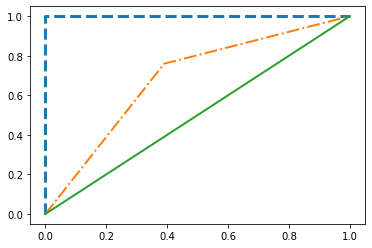

In [89]:
dt_prob_train=dt.predict_proba(x_train)[:,1]
dt_prob_test=dt.predict_proba(x_test)[:,1]


fpr_dttr,tpr_dttr,threshold_dttr=roc_curve(y_train,dt_prob_train)
fpr_dtts,tpr_dtts,threshold_dtts=roc_curve(y_test,dt_prob_test)

plt.plot(fpr_dttr,tpr_dttr,linewidth=3,linestyle="--")
plt.plot(fpr_dtts,tpr_dtts,linewidth=2,linestyle="-.")
plt.plot(fpr_dttr,fpr_dttr,linewidth=2)

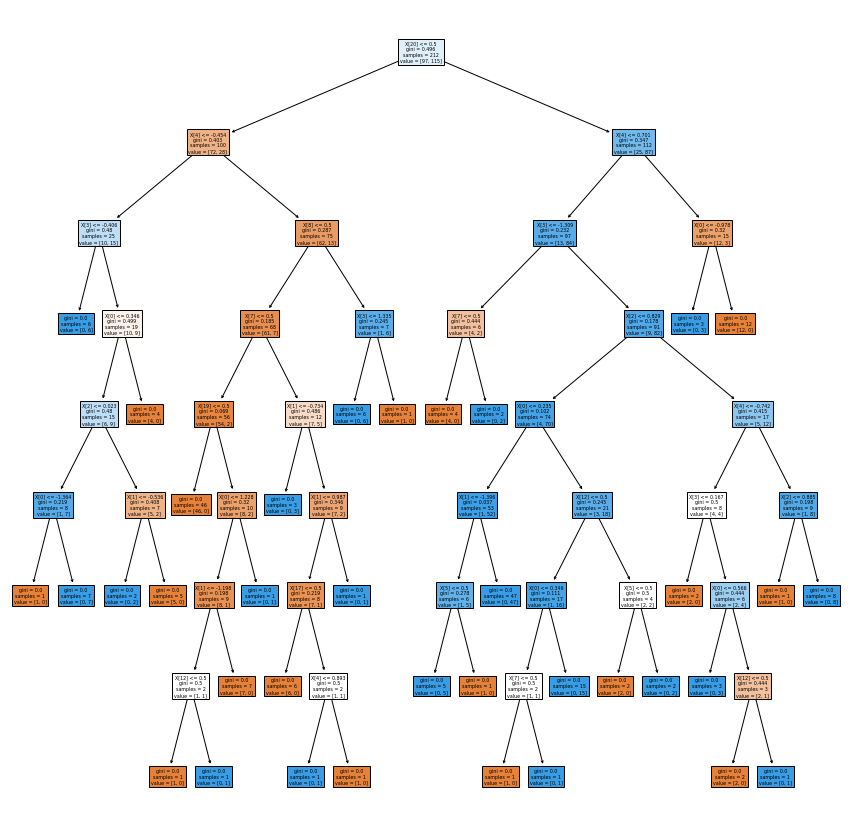

In [90]:
plt.figure(figsize=(15,15))
tree.plot_tree(dt,filled=True)
plt.show()

### Performing Hyperparameter Tuning-Decision Tree 

In [91]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [92]:
paramgrid={'criterion':['gini','entropy'],
          'max_depth':range(2,8,1),
          'min_samples_leaf':range(2,100,2)}

In [93]:
grid_dt=GridSearchCV(DecisionTreeClassifier(random_state=154),paramgrid,verbose=True,n_jobs=-1,refit=True,cv=10,return_train_score=True).fit(x_train,y_train)
print(grid_dt.best_params_);print(grid_dt.best_score_,'\n')

Fitting 10 folds for each of 588 candidates, totalling 5880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   15.5s


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 12}
0.811038961038961 



[Parallel(n_jobs=-1)]: Done 5880 out of 5880 | elapsed:   26.4s finished


In [94]:
dt_tuned=DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=12,random_state=27).fit(x_train,y_train)
preddt_tuned_train=dt_tuned.predict(x_train)
preddt_tuned_test=dt_tuned.predict(x_test)
print("Training Accuracy:",dt_tuned.score(x_train,y_train))
print("Test Accuracy:",dt_tuned.score(x_test,y_test))

Training Accuracy: 0.8254716981132075
Test Accuracy: 0.7472527472527473


In [95]:
print("For Training set:\n",confusion_matrix(y_train,preddt_tuned_train))

For Training set:
 [[81 16]
 [21 94]]


In [96]:
print("For Test set:\n",confusion_matrix(y_test,preddt_tuned_test))

For Test set:
 [[28 13]
 [10 40]]


In [97]:
print("Classification Report for training set:")
pd.DataFrame(classification_report(y_train, preddt_tuned_train, output_dict=True)).T

Classification Report for training set:


,precision,recall,f1-score,support
0,0.794118,0.835052,0.814070,97.000000
1,0.854545,0.817391,0.835556,115.000000
accuracy,0.825472,0.825472,0.825472,0.825472
macro avg,0.824332,0.826221,0.824813,212.000000
weighted avg,0.826897,0.825472,0.825725,212.000000


In [98]:
print("Classification Report for test set:")
pd.DataFrame(classification_report(y_test, preddt_tuned_test, output_dict=True)).T

Classification Report for test set:


,precision,recall,f1-score,support
0,0.736842,0.682927,0.708861,41.000000
1,0.754717,0.800000,0.776699,50.000000
accuracy,0.747253,0.747253,0.747253,0.747253
macro avg,0.745780,0.741463,0.742780,91.000000
weighted avg,0.746663,0.747253,0.746135,91.000000


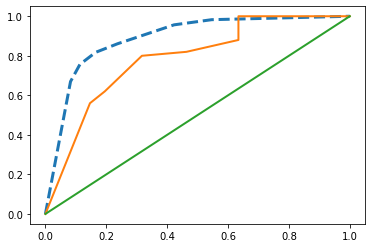

In [99]:
tuneddt_prob_train=dt_tuned.predict_proba(x_train)[:,1]
tuneddt_prob_test=dt_tuned.predict_proba(x_test)[:,1]


fprdt_tutr,tprdt_tutr,thresholddt_tutr=roc_curve(y_train,tuneddt_prob_train)
fprdt_tuts,tprdt_tuts,thresholddt_tuts=roc_curve(y_test,tuneddt_prob_test)

plt.plot(fprdt_tutr,tprdt_tutr,linewidth=3,linestyle="--")
plt.plot(fprdt_tuts,tprdt_tuts,linewidth=2)
plt.plot(fprdt_tutr,fprdt_tutr,linewidth=2)

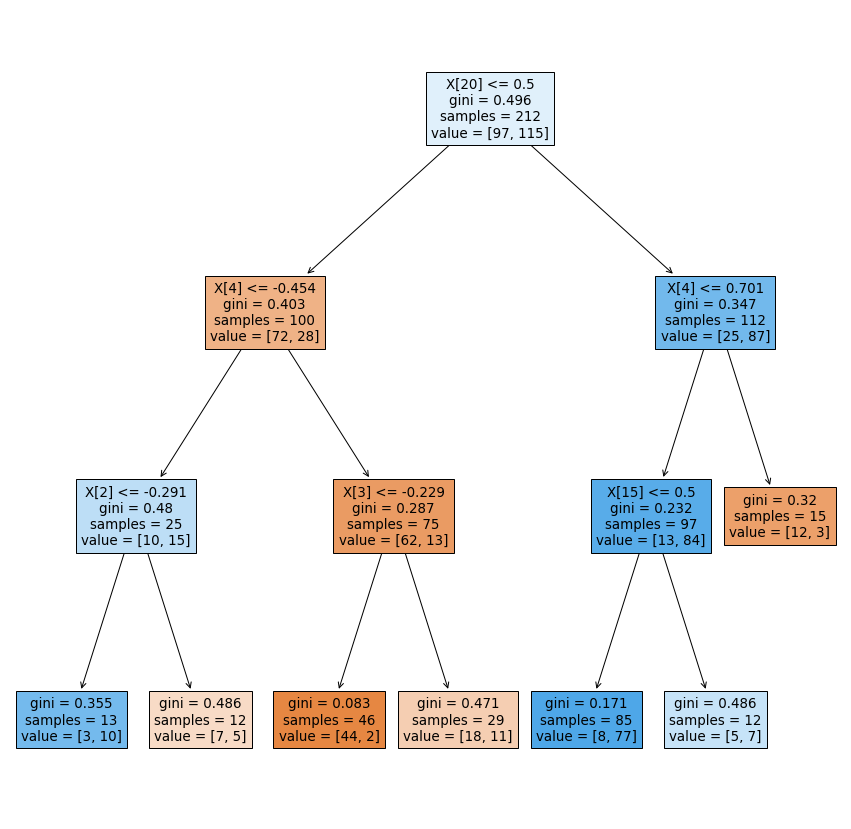

In [100]:
plt.figure(figsize=(15,15))
tree.plot_tree(dt_tuned,filled=True)
plt.show()

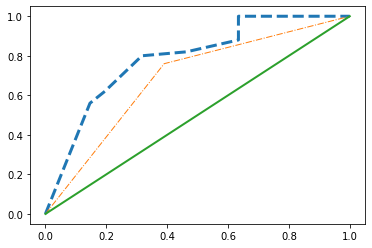

In [101]:
# Test accuracy -> baseline vs tuned model
plt.plot(fprdt_tuts,tprdt_tuts,linewidth=3,linestyle="--")
plt.plot(fpr_dtts,tpr_dtts,linewidth=1,linestyle='-.')
plt.plot(fprdt_tuts,fprdt_tuts,linewidth=2)

In above two models, it is observed that there is significant difference in training and test accuracy for both baseline as well as tuned models. However, test accuracy for tuned model is far ahead of base decision tree model. Still the model overfits due to lack of sufficient data.

Lets explore another approach that aims to reduce effect of overfitting in decision trees, i.e., cost complexity pruining (ccp_alpha) approach.

In [102]:
clf=DecisionTreeClassifier(random_state=97)
path = clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities

Cost complexity pruning provides an option to control the size of a tree.

Greater values of ccp_alpha increase the number of nodes pruned. In other words, if ccp_alpa value is at its highest, then it means that the entire tree will be pruned. With increase in ccp_alpha, number of nodes to be pruned from tree also increases.

Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

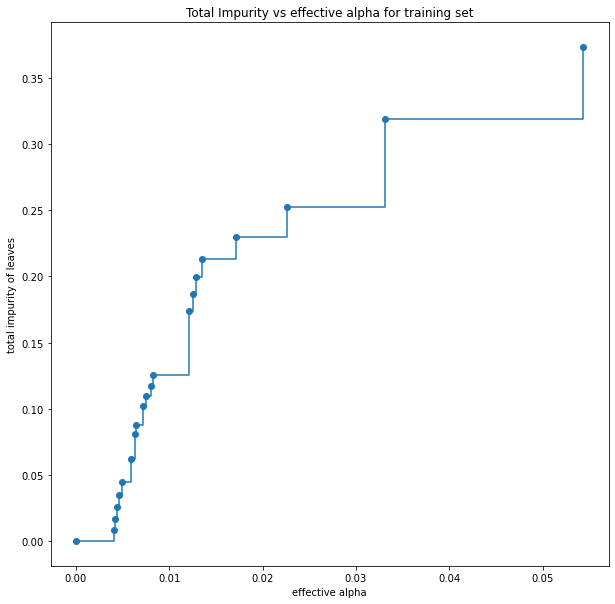

In [103]:
#plotting alpha values vs impurity plot
# Excluding last ccp_alpha and impurity value as it represents tree with only one node
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

#### Note => The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, with one node only and hence have highest impurity.(as we know that most impure node is root itself). 

### Training decision tree with respect to ccp_alpha value (excluding last one)

In [104]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {0} with ccp_alpha: {1}".format(
      clfs[-1].tree_.node_count,ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12300265727508519


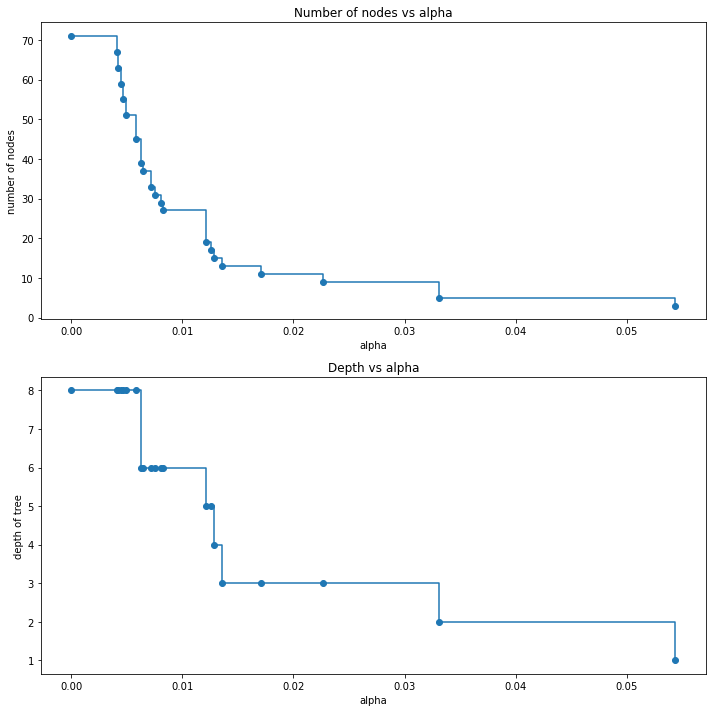

In [105]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# total number of nodes
node_counts = [clf.tree_.node_count for clf in clfs]

# depth of tree
depth = [clf.tree_.max_depth for clf in clfs]

# number of nodes vs ccp_alpha value
fig, ax = plt.subplots(2, 1,figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

# depth vs ccp_alpha value
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and approximately 69% testing accuracy.

As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.

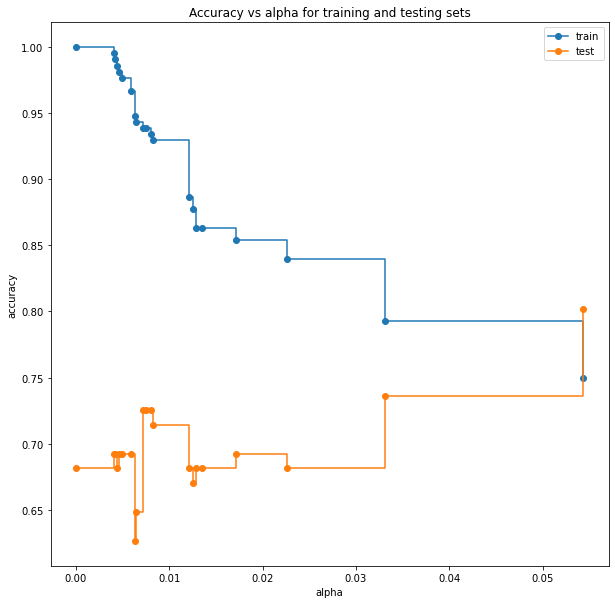

In [106]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

training accuracy: 0.75
test accuracy: 0.8021978021978022


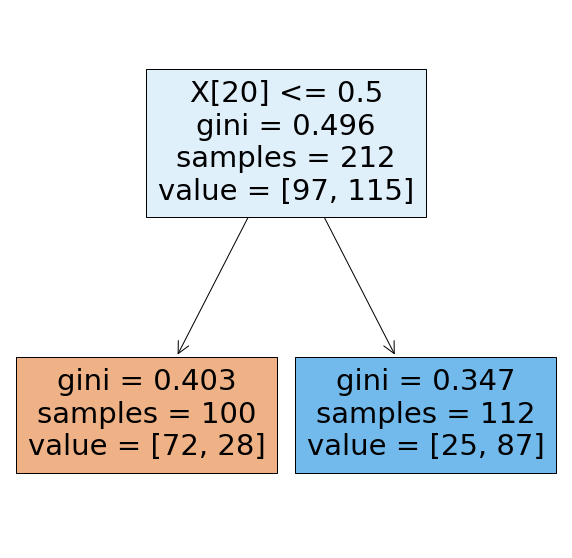

In [138]:
clf=DecisionTreeClassifier(ccp_alpha=0.055,random_state=86).fit(x_train,y_train)
print("training accuracy:",clf.score(x_train,y_train))
print("test accuracy:",clf.score(x_test,y_test))
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True)
plt.show()

In this particular case, due to lack of ample data, there is sufficiently huge difference existing even when we pruned the tree. However, maximum possible test accuracy in this particular case is achieved at alpha value 0.055-0.06.

### Random Forest 

In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=1234).fit(x_train,y_train)
pred_rfc_train=rfc.predict(x_train)
pred_rfc_test=rfc.predict(x_test)
print("Training Accuracy:",rfc.score(x_train,y_train))
print("Test Accuracy:",rfc.score(x_test,y_test))

Training Accuracy: 1.0
Test Accuracy: 0.8131868131868132


In [109]:
print("For Training set:\n",confusion_matrix(y_train,pred_rfc_train))

For Training set:
 [[ 97   0]
 [  0 115]]


In [110]:
print("For Test set:\n",confusion_matrix(y_test,pred_rfc_test))

For Test set:
 [[28 13]
 [ 4 46]]


In [111]:
print("Classification Report for training set:")
pd.DataFrame(classification_report(y_train, pred_rfc_train, output_dict=True)).T

Classification Report for training set:


,precision,recall,f1-score,support
0,1.0,1.0,1.0,97.0
1,1.0,1.0,1.0,115.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,212.0
weighted avg,1.0,1.0,1.0,212.0


In [112]:
print("Classification Report for test set:")
pd.DataFrame(classification_report(y_test, pred_rfc_test, output_dict=True)).T

Classification Report for test set:


,precision,recall,f1-score,support
0,0.875000,0.682927,0.767123,41.000000
1,0.779661,0.920000,0.844037,50.000000
accuracy,0.813187,0.813187,0.813187,0.813187
macro avg,0.827331,0.801463,0.805580,91.000000
weighted avg,0.822616,0.813187,0.809383,91.000000


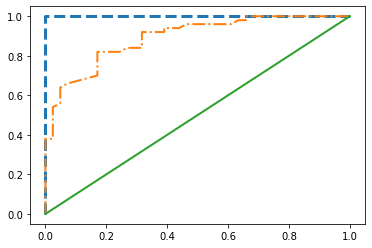

In [113]:
rfc_prob_train=rfc.predict_proba(x_train)[:,1]
rfc_prob_test=rfc.predict_proba(x_test)[:,1]


fpr_rfctr,tpr_rfctr,threshold_rfctr=roc_curve(y_train,rfc_prob_train)
fpr_rfcts,tpr_rfcts,threshold_rfcts=roc_curve(y_test,rfc_prob_test)

plt.plot(fpr_rfctr,tpr_rfctr,linewidth=3,linestyle="--")
plt.plot(fpr_rfcts,tpr_rfcts,linewidth=2,linestyle="-.")
plt.plot(fpr_rfctr,fpr_rfctr,linewidth=2)

### Performing Hyperparameter Tuning-Random Forest 

In [ ]:
RandomForestClassifier()

In [121]:
paramgridrfc={'criterion':['gini','entropy'],
          'max_depth':range(2,8,1),
          'min_samples_leaf':range(2,100,4),
             'n_estimators':range(10,100,20)}

In [122]:
grid_rfc=GridSearchCV(RandomForestClassifier(random_state=154),paramgridrfc,verbose=True,n_jobs=-1,refit=True,cv=10,return_train_score=True).fit(x_train,y_train)
print(grid_rfc.best_params_);print(grid_rfc.best_score_,'\n')

Fitting 10 folds for each of 1500 candidates, totalling 15000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 712 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 1412 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2312 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3412 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4712 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 6212 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 7912 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 9812 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 11912 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 14212 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 15000 out of 15000 | elapsed: 10.5min finished


{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 50}
0.8205627705627705 



In [123]:
rfc_tuned=RandomForestClassifier(criterion='gini',max_depth=4,min_samples_leaf=2,n_estimators=50,random_state=27).fit(x_train,y_train)
predrfc_tuned_train=rfc_tuned.predict(x_train)
predrfc_tuned_test=rfc_tuned.predict(x_test)
print("Training Accuracy:",rfc_tuned.score(x_train,y_train))
print("Test Accuracy:",rfc_tuned.score(x_test,y_test))

Training Accuracy: 0.910377358490566
Test Accuracy: 0.8021978021978022


In [124]:
print("For Training set:\n",confusion_matrix(y_train,predrfc_tuned_train))

For Training set:
 [[ 87  10]
 [  9 106]]


In [125]:
print("For Test set:\n",confusion_matrix(y_test,predrfc_tuned_test))

For Test set:
 [[28 13]
 [ 5 45]]


In [126]:
print("Classification Report for training set:")
pd.DataFrame(classification_report(y_train, predrfc_tuned_train, output_dict=True)).T

Classification Report for training set:


,precision,recall,f1-score,support
0,0.906250,0.896907,0.901554,97.000000
1,0.913793,0.921739,0.917749,115.000000
accuracy,0.910377,0.910377,0.910377,0.910377
macro avg,0.910022,0.909323,0.909652,212.000000
weighted avg,0.910342,0.910377,0.910339,212.000000


In [127]:
print("Classification Report for test set:")
pd.DataFrame(classification_report(y_test, predrfc_tuned_test, output_dict=True)).T

Classification Report for test set:


,precision,recall,f1-score,support
0,0.848485,0.682927,0.756757,41.000000
1,0.775862,0.900000,0.833333,50.000000
accuracy,0.802198,0.802198,0.802198,0.802198
macro avg,0.812173,0.791463,0.795045,91.000000
weighted avg,0.808582,0.802198,0.798832,91.000000


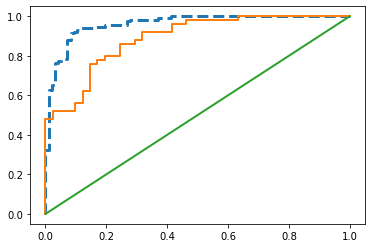

In [128]:
tunedrfc_prob_train=rfc_tuned.predict_proba(x_train)[:,1]
tunedrfc_prob_test=rfc_tuned.predict_proba(x_test)[:,1]


fprrfc_tutr,tprrfc_tutr,thresholdrfc_tutr=roc_curve(y_train,tunedrfc_prob_train)
fprrfc_tuts,tprrfc_tuts,thresholdrfc_tuts=roc_curve(y_test,tunedrfc_prob_test)

plt.plot(fprrfc_tutr,tprrfc_tutr,linewidth=3,linestyle="--")
plt.plot(fprrfc_tuts,tprrfc_tuts,linewidth=2)
plt.plot(fprrfc_tutr,fprrfc_tutr,linewidth=2)

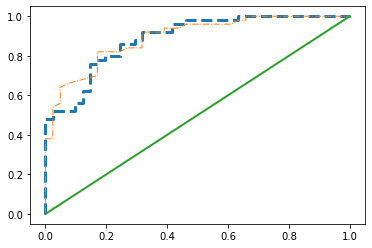

In [129]:
# Test accuracy -> baseline vs tuned model
plt.plot(fprrfc_tuts,tprrfc_tuts,linewidth=3,linestyle="--")
plt.plot(fpr_rfcts,tpr_rfcts,linewidth=1,linestyle='-.')
plt.plot(fprrfc_tuts,fprrfc_tuts,linewidth=2)

Due to less quantity of data, the model still overfits. However, among all the models, random forest gave best possible accuracy for test set, with or without tuning the model. Also, for above dataset, after tuning all the models gave almost similar test accuracy( specially random forest and decision tree).

### Saving the model 

In [139]:
import pickle

In [140]:
filename_log='logistic.sav'
pickle.dump(log_tuned,open(filename_log,'wb'))

In [141]:
filename_dt='decisiontree.sav'
pickle.dump(dt_tuned,open(filename_dt,'wb'))

In [142]:
filename_rfc='randomforest.sav'
pickle.dump(rfc_tuned,open(filename_rfc,'wb'))

### Loading the model from disk 

In [144]:
model_log=pickle.load(open(filename_log,'rb'))
model_dt=pickle.load(open(filename_dt,'rb'))
model_rfc=pickle.load(open(filename_rfc,'rb'))

In [146]:
# persisted logistic regression model
model_log.score(x_train,y_train),model_log.score(x_test,y_test)

(0.9198113207547169, 0.7912087912087912)

In [147]:
# persisted decision tree model
model_dt.score(x_train,y_train),model_dt.score(x_test,y_test)

(0.8254716981132075, 0.7472527472527473)

In [148]:
# persisted random forest model
model_rfc.score(x_train,y_train),model_rfc.score(x_test,y_test)

(0.910377358490566, 0.8021978021978022)